#DATA SCIENCE & STATISTICAL COMPUTING

##CP (Check Point 3 - 2 Semestre)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Carregar o dataset
file_path = 'cards.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Mostrar as primeiras linhas do dataset para explorar a estrutura
data.head()


,card_id,playerClass,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,True,It's like putting racing stripes and a giant s...,NaN,NaN,NaN,NaN,NaN,NaN
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,True,"Rejected names: Forty-Foot Faceless, Big ol' N...",NaN,NaN,NaN,NaN,NaN,NaN



## Análise, Limpeza e formatação dos dados


### Remover duplicatas

In [ ]:

# Verificar o número de duplicatas
num_duplicates = data.duplicated().sum()
print(f"Total de duplicatas encontradas: {num_duplicates}")
# Remover duplicatas, se houver
data = data.drop_duplicates()
print("Duplicatas removidas.")

Total de duplicatas encontradas: 0
Duplicatas removidas.


### Verificar valores nulos

In [ ]:
# Verificar a presença de valores nulos
null_counts = data.isnull().sum()
print("Valores nulos por coluna:")
print(null_counts[null_counts > 0])

# Remover linhas com valores nulos ou preencher com um valor padrão
data = data.dropna()  # Remove todas as linhas com valores nulos
print("Linhas com valores nulos foram removidas.")

Valores nulos por coluna:
playerClass                3
type                       1
name                       1
set                        1
text                     433
cost                     651
attack                  1561
health                  1451
rarity                  1420
collectible             1749
flavor                  1763
race                    2491
how_to_earn             2574
how_to_earn_golden      2529
targeting_arrow_text    2764
faction                 2754
durability              2754
dtype: int64
Linhas com valores nulos foram removidas.


#Estatísticas Descritivas

### Pergunta 1: Qual é a distribuição de raridade das cartas?

In [ ]:
# Contar a quantidade de cartas por raridade
rarity_counts = data['rarity'].value_counts()

# Exibir a distribuição de raridade
for rarity, count in rarity_counts.items():
   print(f"Raridade {rarity}: {count} cartas")

Explicação: Esse código retorna o ataque e a vida médios para cada classe. Isso é útil para entender o foco ofensivo ou defensivo das cartas de cada classe.

### Pergunta 2: Qual é o custo médio das cartas por raridade?

In [ ]:
# Calcular o custo médio por raridade
average_cost_by_rarity = data.groupby('rarity')['cost'].mean()

# Exibir o custo médio por raridade
for rarity, avg_cost in average_cost_by_rarity.items():
   print(f"Custo médio das cartas de raridade {rarity}: {avg_cost:.2f}")

Explicação: Este código mostra o custo médio de mana para cada raridade. Isso ajuda a verificar se cartas mais raras tendem a ter custos maiores.

### Pergunta 3: Qual é o ataque e vida médios das cartas por classe?

In [ ]:
# Calcular ataque e vida médios por classe
average_attack_by_class = data.groupby('playerClass')['attack'].mean()
average_health_by_class = data.groupby('playerClass')['health'].mean()

# Exibir o ataque e vida médios por classe
for player_class in average_attack_by_class.index:
   print(f"Classe {player_class}: Ataque médio = {average_attack_by_class[player_class]:.2f}, Vida média = {average_health_by_class[player_class]:.2f}")

Explicação: Esse código retorna o ataque e a vida médios para cada classe. Isso é útil para entender o foco ofensivo ou defensivo das cartas de cada classe.

###Pergunta 4: Qual é a proporção de cartas do tipo SPELL e MINION?

In [ ]:
# Contar a quantidade de cartas por tipo e calcular a proporção
type_counts = data['type'].value_counts(normalize=True) * 100

# Exibir a proporção de cada tipo de carta
for card_type, proportion in type_counts.items():
   print(f"Proporção de cartas do tipo {card_type}: {proportion:.2f}%")

Explicação: Esse código mostra a proporção de cartas do tipo SPELL e MINION, indicando se há uma preferência por feitiços ou criaturas no dataset.

###Pergunta 5: Quais são as palavras mais comuns nas descrições das habilidades?

In [ ]:
from collections import Counter
import re

# Concatenar todas as descrições e contar palavras
descriptions = ' '.join(data['text'].dropna())
words = re.findall(r'\b\w+\b', descriptions.lower())  # Extrair palavras e transformar em minúsculas
word_counts = Counter(words)

# Exibir as 10 palavras mais comuns nas descrições
print("Palavras mais comuns nas descrições das habilidades:")
for word, count in word_counts.most_common(10):
   print(f"{word}: {count} ocorrências")


Palavras mais comuns nas descrições das habilidades:


Explicação: Esse código exibe as 10 palavras mais frequentes nas descrições das habilidades, revelando padrões e temas comuns entre as cartas, como termos que indicam efeitos de destruição, invocação ou cura.

#Graficos

### Pergunta 1: Quais classes têm mais cartas de baixo custo (custo ≤ 3) com habilidades impactantes como Battlecry ou Deathrattle?

**Análise**

Classes com uma alta contagem de cartas de baixo custo e habilidades impactantes podem favorecer estratégias de início de jogo, permitindo que os jogadores estabeleçam controle do tabuleiro rapidamente. Se uma classe se destaca significativamente, isso indica uma tendência para jogadas agressivas ou versáteis, aproveitando essas habilidades para pressionar o oponente desde o começo da partida.

<ipython-input-27-de73edb4a82b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impactful_counts.index, y=impactful_counts.values, palette='viridis')


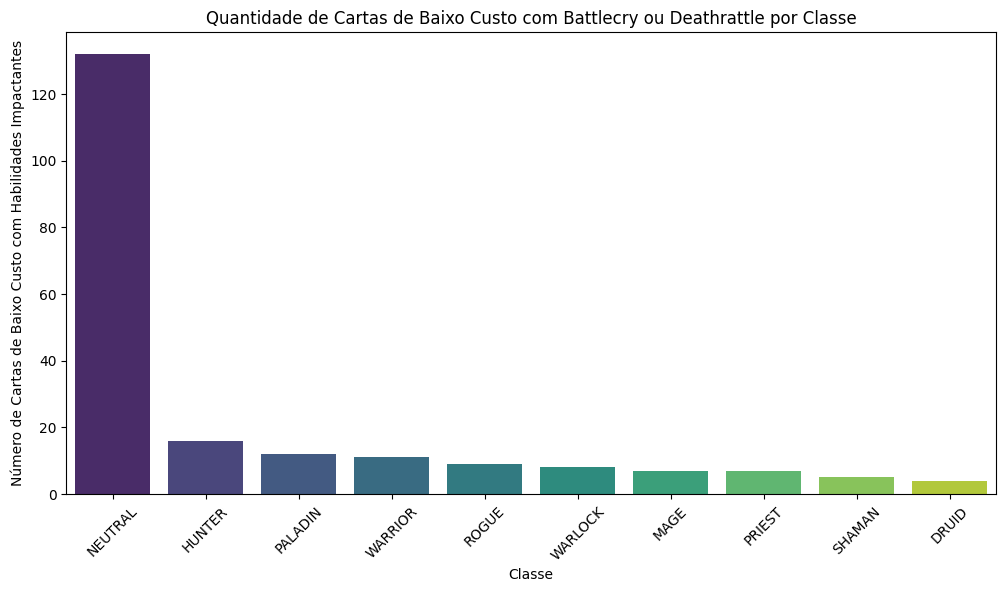

In [27]:
# Filtrando cartas de baixo custo (<= 3) com habilidades como "Battlecry" ou "Deathrattle"
low_cost_impactful = data[(data['cost'] <= 3) & (data['text'].str.contains('Battlecry|Deathrattle', na=False))]

# Contar o número de cartas por classe
impactful_counts = low_cost_impactful['playerClass'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=impactful_counts.index, y=impactful_counts.values, palette='viridis')
plt.title('Quantidade de Cartas de Baixo Custo com Battlecry ou Deathrattle por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Cartas de Baixo Custo com Habilidades Impactantes')
plt.xticks(rotation=45)
plt.show()


### Pergunta 2: Quais classes apresentam a maior diversidade de efeitos especiais como Battlecry, Deathrattle, Taunt e Charge?

**Análise**

O gráfico mostra cada tipo de efeito especial em uma cor distinta, empilhado por classe. Assim, fica mais fácil identificar quais classes utilizam predominantemente certos efeitos especiais. Classes com uma alta diversidade de efeitos (como várias barras coloridas) indicam uma flexibilidade estratégica maior, enquanto classes que dependem de um único efeito têm uma estratégia mais especializada e direta.

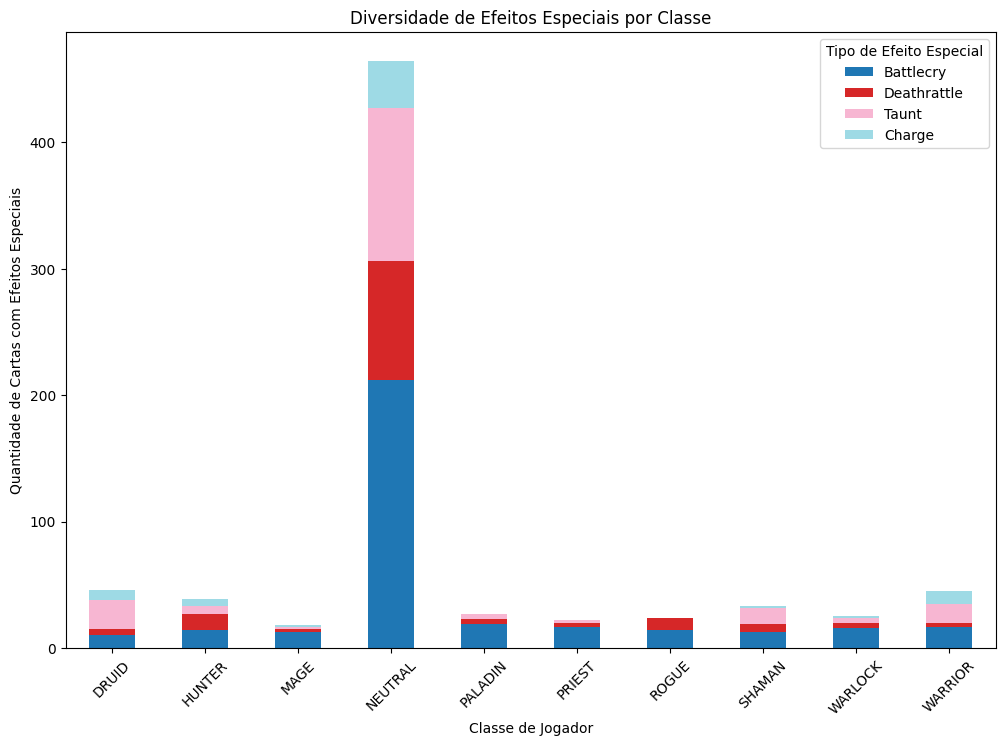

In [28]:
# Filtrar cartas com efeitos especiais específicos
effects_cards = data[data['text'].str.contains('Battlecry|Deathrattle|Taunt|Charge', na=False)]

# Extrair apenas os efeitos principais e contá-los por classe
effects_by_class = effects_cards.copy()
effects_by_class['Battlecry'] = effects_by_class['text'].str.contains('Battlecry', na=False)
effects_by_class['Deathrattle'] = effects_by_class['text'].str.contains('Deathrattle', na=False)
effects_by_class['Taunt'] = effects_by_class['text'].str.contains('Taunt', na=False)
effects_by_class['Charge'] = effects_by_class['text'].str.contains('Charge', na=False)

# Contagem de cada efeito por classe
effects_summary = effects_by_class.groupby('playerClass')[['Battlecry', 'Deathrattle', 'Taunt', 'Charge']].sum()

# Plotar gráfico de barras empilhadas para visualizar cada tipo de efeito por classe
effects_summary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Diversidade de Efeitos Especiais por Classe')
plt.xlabel('Classe de Jogador')
plt.ylabel('Quantidade de Cartas com Efeitos Especiais')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Efeito Especial')
plt.show()




### Pergunta 3: Cartas com raças específicas, como Beast ou Dragon, são mais predominantes em algumas classes? Existe alguma classe que utilize mais essas cartas como uma vantagem estratégica?

**Análise**

Este gráfico revela quais classes exploram mais certas raças como Beast ou Dragon. Classes com um número significativo de uma raça específica podem se beneficiar de sinergias internas, indicando que essa classe possui estratégias construídas em torno de vantagens que essas raças proporcionam. Isso pode ser um indício de uma estratégia focada na sinergia com raças específicas.

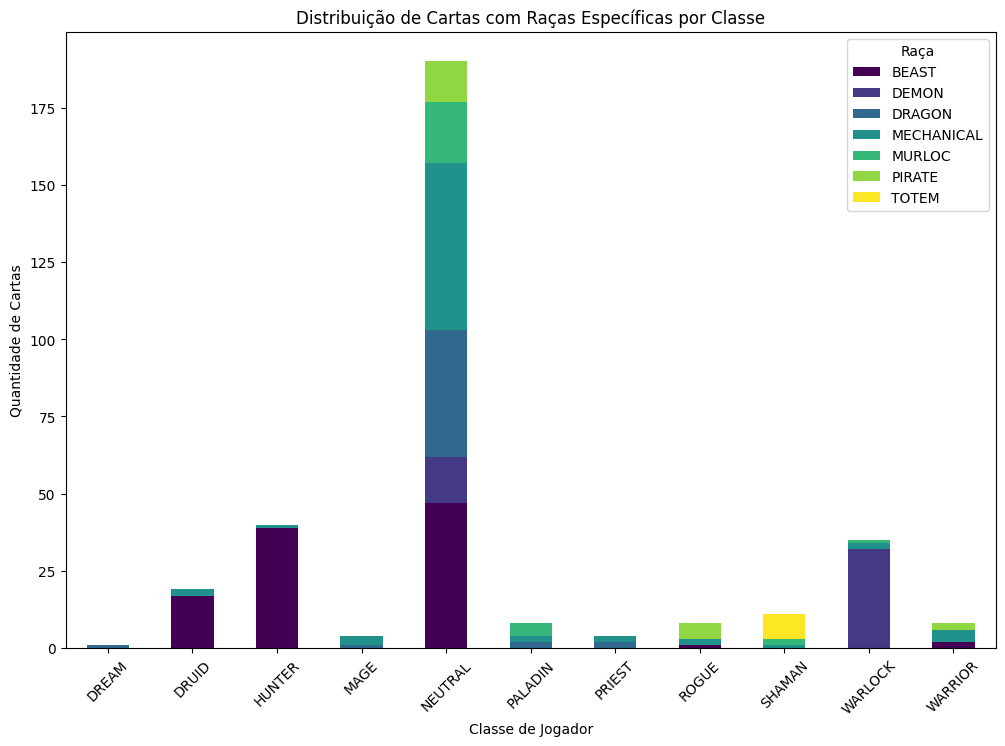

In [29]:
# Filtrar cartas que possuem uma raça específica
race_cards = data.dropna(subset=['race'])

# Contar o número de cartas por raça e classe
race_count_by_class = race_cards.groupby(['playerClass', 'race']).size().unstack().fillna(0)

# Gráfico de barras empilhadas
race_count_by_class.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribuição de Cartas com Raças Específicas por Classe')
plt.xlabel('Classe de Jogador')
plt.ylabel('Quantidade de Cartas')
plt.legend(title='Raça')
plt.xticks(rotation=45)
plt.show()


### Pergunta 4: Em quais conjuntos as cartas Legendary são mais comuns? Esses conjuntos têm atributos ou habilidades significativamente diferentes?

**Análise**

Este gráfico mostra tanto a quantidade de cartas Legendary por conjunto (barras) quanto o custo médio dessas cartas (linha). Conjuntos com um grande número de cartas Legendary sugerem uma abordagem voltada a cartas de alta importância estratégica. O custo médio também indica se esses conjuntos favorecem cartas lendárias mais acessíveis (custo baixo) ou de alto custo, com maior impacto potencial em estágios avançados de jogo.

<ipython-input-30-f8de2737a7e5>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


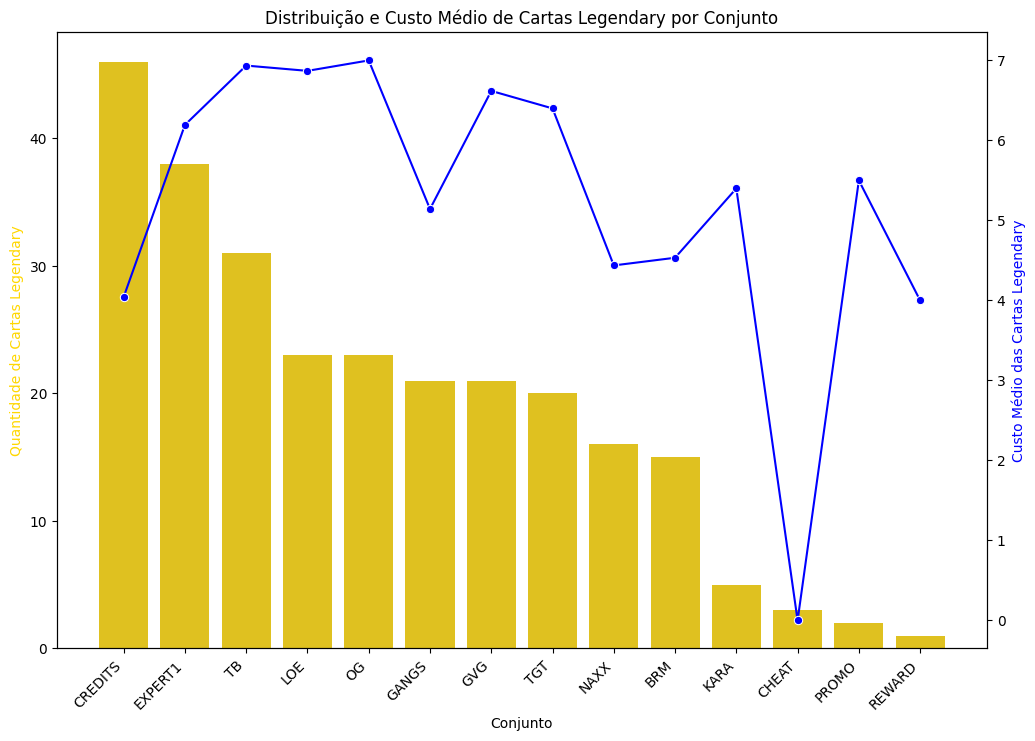

In [30]:
# Filtrar cartas de raridade Legendary
legendary_cards = data[data['rarity'] == 'LEGENDARY']

# Agrupar e contar cartas Legendary por conjunto e calcular custo médio
legendary_stats = legendary_cards.groupby('set').agg(
    quantidade=('card_id', 'size'),
    custo_medio=('cost', 'mean')
).sort_values(by='quantidade', ascending=False)

# Gráfico com barras para quantidade e linha para custo médio
fig, ax1 = plt.subplots(figsize=(12, 8))

# Barras para quantidade de cartas Legendary
sns.barplot(x=legendary_stats.index, y=legendary_stats['quantidade'], color='gold', ax=ax1)
ax1.set_ylabel('Quantidade de Cartas Legendary', color='gold')
ax1.set_xlabel('Conjunto')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Linha para o custo médio das cartas
ax2 = ax1.twinx()
sns.lineplot(x=legendary_stats.index, y=legendary_stats['custo_medio'], marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Custo Médio das Cartas Legendary', color='blue')

plt.title('Distribuição e Custo Médio de Cartas Legendary por Conjunto')
plt.show()



### Pergunta 5: Qual é o custo médio para cartas com ataque acima de 7? Essas cartas pertencem a uma classe ou conjunto específico?

**Análise**

Este gráfico mostra a quantidade de cartas com ataque superior a 7 em cada conjunto (barras), assim como o custo médio dessas cartas (linha). Observamos que certos conjuntos possuem não só uma maior quantidade de cartas de ataque alto, mas também variações significativas no custo médio.

**Tendência por Conjunto:** Os conjuntos com maior quantidade de cartas de ataque alto indicam uma possível intenção de design voltada a personagens poderosos, que influenciam o rumo do jogo de forma decisiva.

**Estratégia de Custo:** Conjuntos com custo médio mais baixo para cartas de ataque alto permitem que o jogador utilize cartas fortes mais cedo, promovendo uma estratégia de jogo agressiva. Em contrapartida, conjuntos com custo alto podem ser voltados a uma estratégia de longo prazo.

**Custo Médio Geral:** O custo médio de todas as cartas com ataque maior que 7 (exibido no console) serve como referência para comparar o custo médio por conjunto. Valores acima ou abaixo dessa média indicam um design específico voltado a estratégias de ataque imediato ou defensivo.

<ipython-input-31-92a24dd1cbd7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


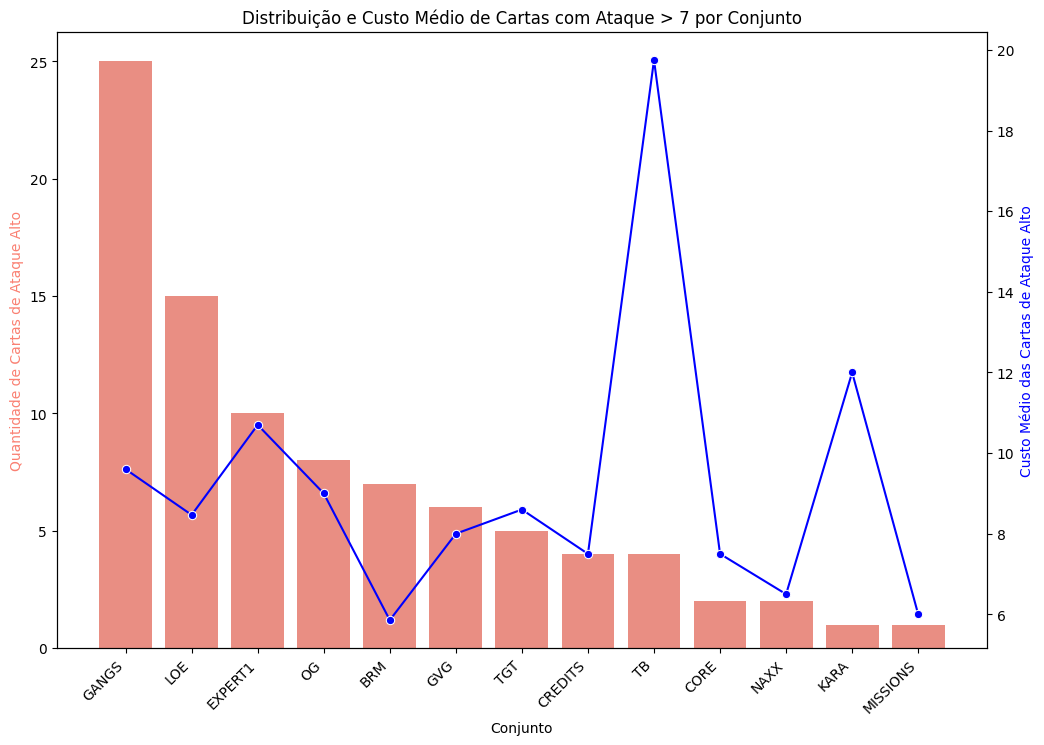

Custo médio geral para cartas com ataque maior que 7: 9.255555555555556


In [31]:
# Filtrar cartas com ataque maior que 7
high_attack_cards = data[data['attack'] > 7]

# Calcular o custo médio de cartas com ataque alto
average_cost_high_attack = high_attack_cards['cost'].mean()

# Agrupar e contar cartas de ataque alto por conjunto e calcular o custo médio
high_attack_stats = high_attack_cards.groupby('set').agg(
    quantidade=('card_id', 'size'),
    custo_medio=('cost', 'mean')
).sort_values(by='quantidade', ascending=False)

# Plotar gráfico combinando barras para quantidade e linha para custo médio
fig, ax1 = plt.subplots(figsize=(12, 8))

# Barras para a quantidade de cartas
sns.barplot(x=high_attack_stats.index, y=high_attack_stats['quantidade'], color='salmon', ax=ax1)
ax1.set_ylabel('Quantidade de Cartas de Ataque Alto', color='salmon')
ax1.set_xlabel('Conjunto')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Linha para o custo médio das cartas
ax2 = ax1.twinx()
sns.lineplot(x=high_attack_stats.index, y=high_attack_stats['custo_medio'], marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Custo Médio das Cartas de Ataque Alto', color='blue')

plt.title('Distribuição e Custo Médio de Cartas com Ataque > 7 por Conjunto')
plt.show()

# Exibir o custo médio no console
print("Custo médio geral para cartas com ataque maior que 7:", average_cost_high_attack)


### Pergunta 6: Quais classes tendem a usar mais cartas defensivas (alta vida e baixo ataque)?

**Análise**

Classes com um número maior de cartas defensivas tendem a adotar uma estratégia de resistência, onde o objetivo é controlar o tabuleiro com cartas que possuem alta vida e baixa ofensividade. Essas classes provavelmente buscam prolongar a partida e desgastar o adversário ao invés de atacar rapidamente. Isso pode indicar uma abordagem de jogo mais focada em defesa e controle, o que pode ser vantajoso em partidas de longa duração.

<ipython-input-32-79b81716212d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=defensive_by_class.index, y=defensive_by_class.values, palette='Blues_d')


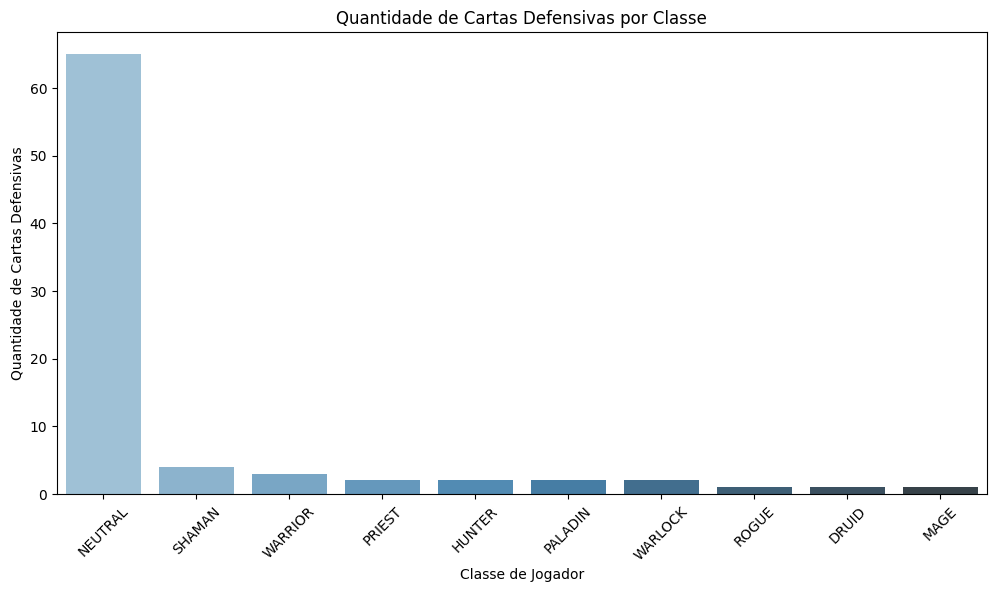

In [32]:
# Definir critérios de cartas defensivas (ataque <= 3 e vida >= 6)
defensive_cards = data[(data['attack'] <= 3) & (data['health'] >= 6)]

# Contagem de cartas defensivas por classe
defensive_by_class = defensive_cards['playerClass'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=defensive_by_class.index, y=defensive_by_class.values, palette='Blues_d')
plt.title('Quantidade de Cartas Defensivas por Classe')
plt.xlabel('Classe de Jogador')
plt.ylabel('Quantidade de Cartas Defensivas')
plt.xticks(rotation=45)
plt.show()

### Pergunta 7: Quais cartas de raridade baixa possuem atributos e habilidades semelhantes a cartas de raridade alta?

**Análise**

No gráfico, as cartas de baixa raridade (azul) e alta raridade (vermelho) são comparadas em termos de ataque e vida. Cartas de raridade baixa que possuem atributos próximos aos de cartas de raridade alta podem ser uma boa opção para jogadores novos, já que oferecem valor similar sem a necessidade de adquirir cartas raras.

Identificar essas cartas pode ajudar os jogadores iniciantes a montar decks competitivos usando cartas comuns e raras enquanto buscam adquirir cartas épicas ou lendárias no futuro. Esse tipo de análise revela quais cartas acessíveis podem desempenhar papéis estratégicos parecidos com cartas mais difíceis de obter.

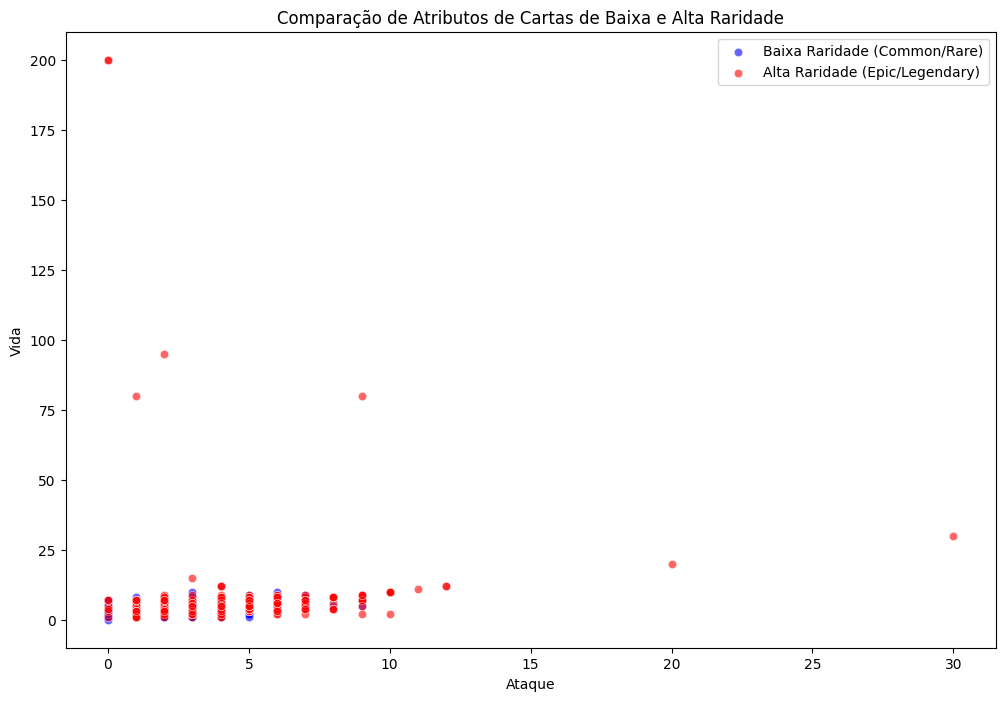

In [33]:
# Filtrar cartas de raridade baixa (COMMON e RARE) e alta (EPIC e LEGENDARY)
low_rarity_cards = data[data['rarity'].isin(['COMMON', 'RARE'])]
high_rarity_cards = data[data['rarity'].isin(['EPIC', 'LEGENDARY'])]

# Plotar gráfico de dispersão para comparar ataque e vida entre cartas de baixa e alta raridade
plt.figure(figsize=(12, 8))
sns.scatterplot(data=low_rarity_cards, x='attack', y='health', color='blue', label='Baixa Raridade (Common/Rare)', alpha=0.6)
sns.scatterplot(data=high_rarity_cards, x='attack', y='health', color='red', label='Alta Raridade (Epic/Legendary)', alpha=0.6)
plt.title('Comparação de Atributos de Cartas de Baixa e Alta Raridade')
plt.xlabel('Ataque')
plt.ylabel('Vida')
plt.legend()
plt.show()


### Pergunta 8: Existe uma classe que utiliza mais cartas do tipo SPELL em relação às cartas do tipo MINION? Qual é a proporção de cartas de cada tipo em cada classe?

**Análise**

Esta pergunta busca entender quais classes têm uma preferência por cartas mágicas (SPELLS) em vez de criaturas (MINIONS), o que pode indicar uma estratégia mais voltada para controle do tabuleiro por meio de habilidades e efeitos ao invés de personagens.

O gráfico de barras empilhadas mostra a proporção de cartas SPELL e MINION para cada classe. Classes com uma maior proporção de cartas SPELL tendem a se concentrar mais em habilidades mágicas e efeitos para controlar o jogo, ao invés de invocar criaturas. Isso pode sugerir uma estratégia mais voltada ao controle do tabuleiro e ao uso de habilidades para manipular o adversário, enquanto classes com uma proporção maior de cartas MINION favorecem uma abordagem mais direta de combate.

Essa análise ajuda a identificar as preferências estratégicas de cada classe e a forma como elas se estruturam, seja pela invocação de criaturas para domínio do tabuleiro ou pela utilização de habilidades para controle e suporte.


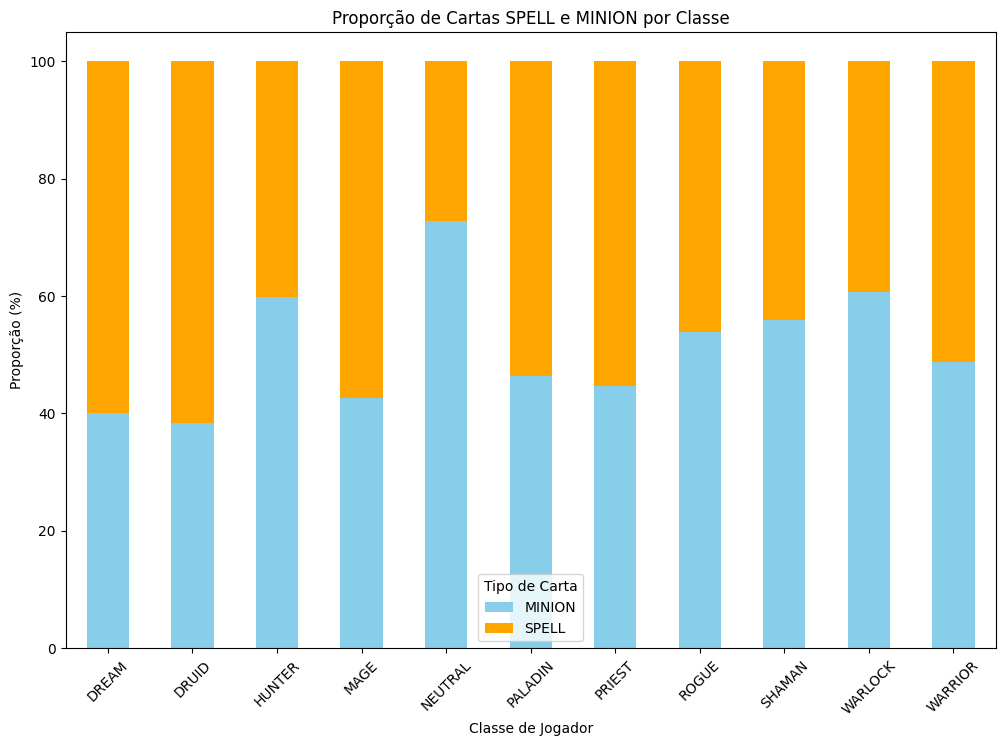

In [34]:
# Filtrar apenas as cartas dos tipos SPELL e MINION
spell_minion_cards = data[data['type'].isin(['SPELL', 'MINION'])]

# Contagem de cada tipo de carta por classe
type_count_by_class = spell_minion_cards.groupby(['playerClass', 'type']).size().unstack().fillna(0)

# Calcular a proporção de cada tipo de carta para cada classe
type_proportion_by_class = type_count_by_class.div(type_count_by_class.sum(axis=1), axis=0) * 100

# Plotar gráfico de barras empilhadas para ver a proporção de SPELLS e MINIONS por classe
type_proportion_by_class.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Proporção de Cartas SPELL e MINION por Classe')
plt.xlabel('Classe de Jogador')
plt.ylabel('Proporção (%)')
plt.legend(title='Tipo de Carta')
plt.xticks(rotation=45)
plt.show()

### Pergunta 9: Qual é a relação entre o tipo de carta (MINION ou SPELL) e a raça das cartas? Existem classes que utilizam raças específicas de forma predominante?

**Análise**

Essa pergunta explora quais raças são mais comuns em cada tipo de carta e em quais classes, permitindo insights sobre estratégias específicas que dependem de certas raças.

Este gráfico mostra a quantidade de cartas de cada raça (Beast, Dragon, etc.) para as classes de jogador que utilizam o tipo MINION. Classes com um alto número de uma raça específica indicam uma afinidade com estratégias focadas nessas criaturas, o que pode significar sinergias e habilidades que aproveitam as características exclusivas das raças. Por exemplo, classes com muitas cartas da raça Dragon podem favorecer habilidades de dragão, enquanto uma predominância de Beast pode indicar uma classe voltada para sinergias animais.


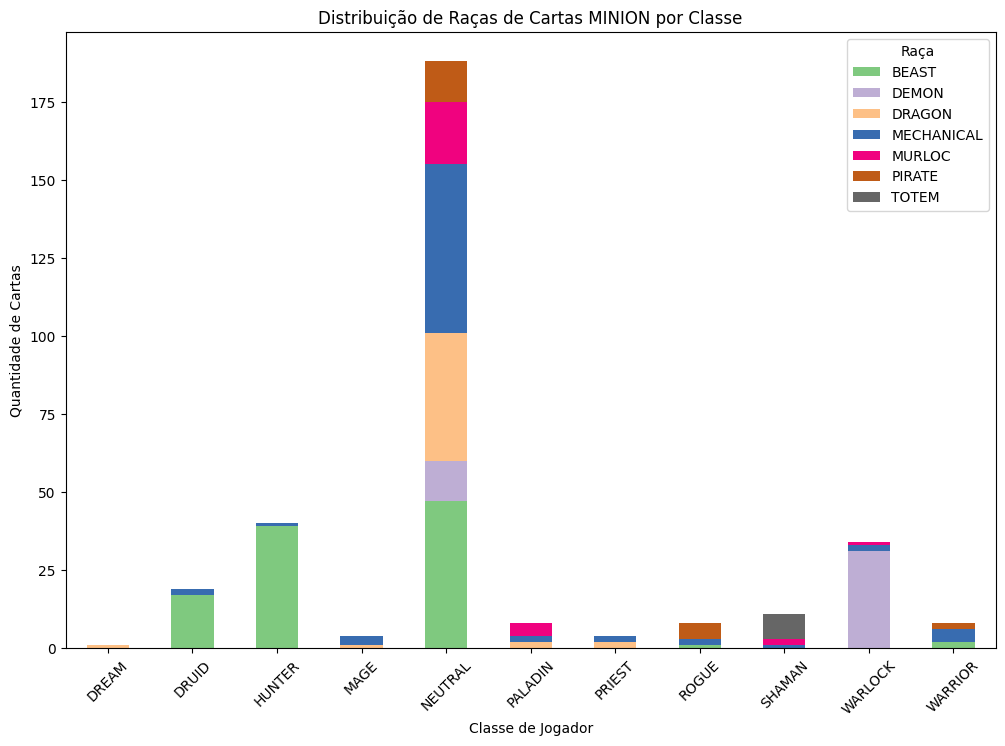

In [35]:
# Filtrar cartas do tipo MINION que têm uma raça específica
minion_with_race = data[(data['type'] == 'MINION') & data['race'].notna()]

# Contar o número de cartas por raça e classe
race_count_by_class = minion_with_race.groupby(['playerClass', 'race']).size().unstack().fillna(0)

# Plotar gráfico de barras empilhadas
race_count_by_class.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Accent')
plt.title('Distribuição de Raças de Cartas MINION por Classe')
plt.xlabel('Classe de Jogador')
plt.ylabel('Quantidade de Cartas')
plt.legend(title='Raça')
plt.xticks(rotation=45)
plt.show()


### Pergunta 10: Existe uma combinação ideal de cartas de baixo custo e habilidades especiais (como Battlecry ou Deathrattle) que maximiza a eficiência de jogadas de alto impacto em diferentes fases do jogo (início, meio e fim)? Em quais classes essas sinergias são mais comuns, e quais características tornam essa combinação eficaz?

***Análise***

O gráfico mostra a eficiência de impacto das cartas com habilidades especiais para cada classe e fase do jogo. Podemos identificar padrões estratégicos de cada classe:

**Classes com Alta Eficiência no Início do Jogo:** Algumas classes apresentam alta eficiência de impacto nas cartas de custo baixo, sugerindo que favorecem um controle agressivo desde o começo da partida. Essas classes provavelmente possuem cartas de custo reduzido que oferecem bom valor com habilidades como Battlecry ou Charge, ideais para pressionar o oponente cedo.

**Classes com Alta Eficiência no Meio do Jogo:** As classes que se destacam na fase intermediária tendem a usar cartas que equilibram custo e valor, garantindo controle do tabuleiro sem gastar todos os recursos rapidamente. Essas classes provavelmente usam uma combinação de habilidades como Taunt e Deathrattle para controlar o fluxo da partida e preparar o terreno para o final.

**Classes com Alta Eficiência no Fim do Jogo:** Classes com eficiência alta no final do jogo sugerem uma estratégia de longo prazo, onde cartas de custo alto e grande impacto são usadas para definir a partida. Essas cartas geralmente possuem habilidades poderosas e valores altos de ataque e vida, mas exigem uma construção de jogo que suporte esse investimento tardio.

**Conclusão**

Esta análise revela que cada classe tende a se especializar em uma fase do jogo, usando combinações de custo e habilidades específicas para maximizar sua eficiência de impacto. Ao entender esses padrões, jogadores podem construir decks que aproveitam essas sinergias e se alinham melhor com as características estratégicas de cada classe.


Início do Jogo: 324 cartas
Meio do Jogo: 277 cartas
Fim do Jogo: 37 cartas


<ipython-input-36-9a302b3687ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_game_cards['impact_efficiency'] = (early_game_cards['attack'] + early_game_cards['health']) / early_game_cards['cost']
<ipython-input-36-9a302b3687ae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_game_cards['impact_efficiency'] = (mid_game_cards['attack'] + mid_game_cards['health']) / mid_game_cards['cost']
<ipython-input-36-9a302b3687ae>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

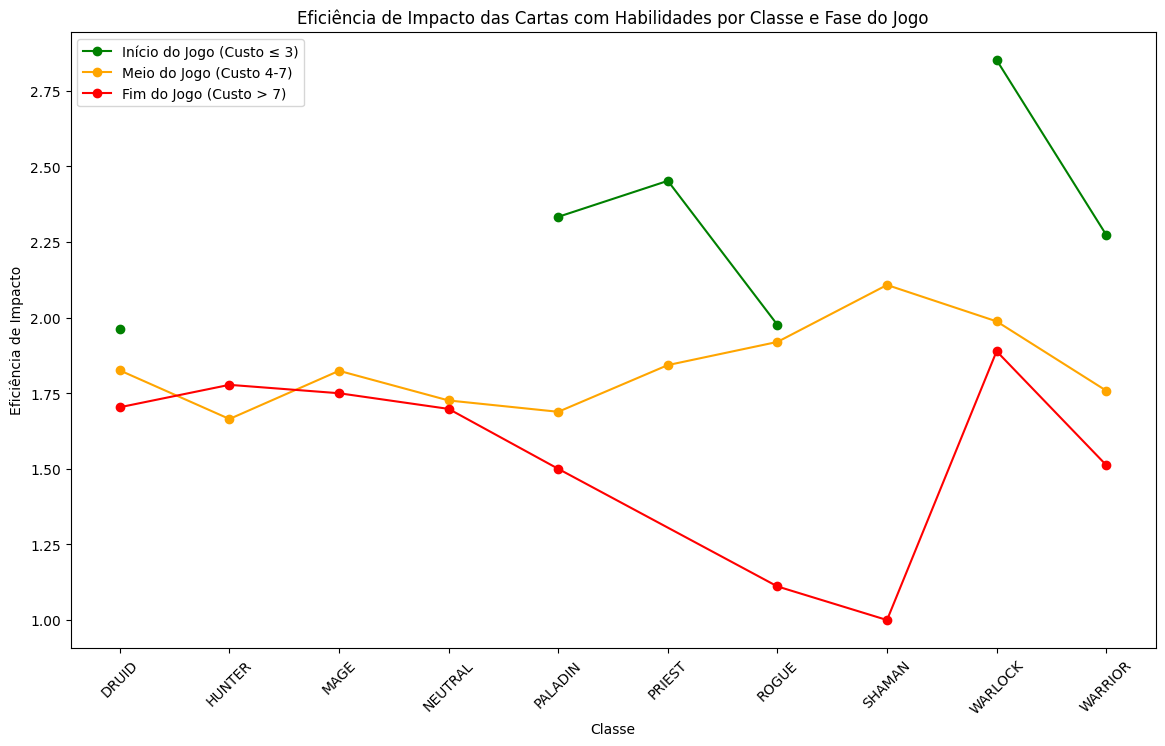

In [36]:
# Definir categorias de fases de jogo para as cartas
early_game_cards = data[(data['cost'] <= 3) & (data['text'].str.contains('Battlecry|Deathrattle|Charge|Taunt', na=False))]
mid_game_cards = data[(data['cost'] > 3) & (data['cost'] <= 7) & (data['text'].str.contains('Battlecry|Deathrattle|Charge|Taunt', na=False))]
late_game_cards = data[(data['cost'] > 7) & (data['text'].str.contains('Battlecry|Deathrattle|Charge|Taunt', na=False))]

# Conferir a quantidade de cartas em cada fase
print(f"Início do Jogo: {len(early_game_cards)} cartas")
print(f"Meio do Jogo: {len(mid_game_cards)} cartas")
print(f"Fim do Jogo: {len(late_game_cards)} cartas")

# Calcular a eficiência de impacto para cada fase
early_game_cards['impact_efficiency'] = (early_game_cards['attack'] + early_game_cards['health']) / early_game_cards['cost']
mid_game_cards['impact_efficiency'] = (mid_game_cards['attack'] + mid_game_cards['health']) / mid_game_cards['cost']
late_game_cards['impact_efficiency'] = (late_game_cards['attack'] + late_game_cards['health']) / late_game_cards['cost']

# Agrupar e calcular a média de eficiência de impacto por classe e fase de jogo
early_efficiency_by_class = early_game_cards.groupby('playerClass')['impact_efficiency'].mean()
mid_efficiency_by_class = mid_game_cards.groupby('playerClass')['impact_efficiency'].mean()
late_efficiency_by_class = late_game_cards.groupby('playerClass')['impact_efficiency'].mean()

# Plotar a eficiência de impacto por fase de jogo para cada classe
plt.figure(figsize=(14, 8))
plt.plot(early_efficiency_by_class, marker='o', label='Início do Jogo (Custo ≤ 3)', color='green')
plt.plot(mid_efficiency_by_class, marker='o', label='Meio do Jogo (Custo 4-7)', color='orange')
plt.plot(late_efficiency_by_class, marker='o', label='Fim do Jogo (Custo > 7)', color='red')
plt.title('Eficiência de Impacto das Cartas com Habilidades por Classe e Fase do Jogo')
plt.xlabel('Classe')
plt.ylabel('Eficiência de Impacto')
plt.legend()
plt.xticks(rotation=45)
plt.show()